In [2]:
!pip install imageio
!pip install matplotlib


(1280, 956, 3)


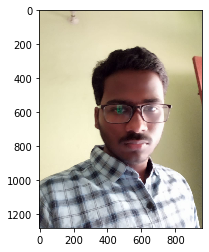

In [6]:
import imageio
import matplotlib.pyplot as plt
im=imageio.imread("./Downloads/WhatsApp Image 2020-03-23 at 7.27.30 PM.jpeg")
print(im.shape)
plt.imshow(im)

(1280, 956)


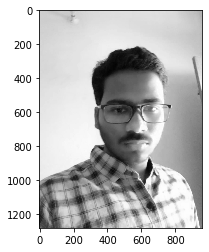

In [7]:
im_red =im[:,:,0]
print(im_red.shape)
plt.imshow(im_red,cmap='gray')

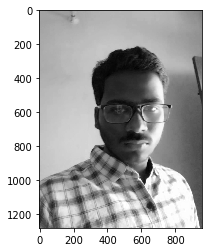

In [8]:
im_blue=im[:,:,2]
plt.imshow(im_blue,cmap="gray")

In [9]:
import tensorflow as tf
import numpy as np
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

C:\Users\FaizAlam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\FaizAlam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\FaizAlam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\FaizAlam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [11]:
# Create flat input vector
x_fc = tf.placeholder(tf.float32,[None,784])
# Create weight matrix variable
W = tf.Variable(tf.truncated_normal([784,10], stddev=0.1))
# Create bias variable
b = tf.Variable(tf.zeros([10]))
# Apply fully connected layer
y_preact = tf.matmul(x_fc,W)+b
y= tf.nn.relu(y_preact)
# Print input/output shape
print(x_fc.shape)
print(y.shape)

(?, 784)
(?, 10)


In [31]:
# Create image input placeholder
x_cnn = tf.placeholder(tf.float32,[None,28,28,1])
# Create convolutional kernel variable
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 16], stddev=0.1))
# create bias variable
b1 = tf.Variable(tf.zeros([16]))
# Apply convolutional layer
conv1_preact= tf.nn.conv2d(x_cnn,W1,strides=[1,1,1,1],padding="SAME")+b1
conv1=tf.nn.relu(conv1_preact)
# Print input/output shape
print(x_cnn.shape)
print(conv1.shape)

(?, 28, 28, 1)
(?, 28, 28, 16)


In [33]:
# 2nd layer variables
W2 = tf.Variable(tf.truncated_normal([5, 5, 16, 32], stddev=0.1))
b2 = tf.Variable(tf.zeros([32]))
# Apply 2nd convolutional layer
conv2=tf.nn.relu(tf.nn.conv2d(conv1,W2,strides=[1,1,1,1],padding="SAME")+b2)
print(conv2.shape)

(?, 28, 28, 32)


In [23]:
#reshaping tensors
M = tf.constant(np.zeros([4,3]),tf.float32)
M2 = tf.reshape(M, [1,1,12])
M3 = tf.reshape(M, [2,1,2,3])
M4 = tf.reshape(M, [-1,2,3])
M5 = tf.reshape(M, [-1])

In [24]:
# reshape flat input image into a 4d batched image input
x_flat=tf.placeholder(tf.float32,[None,784])
x_reshaped=tf.reshape(x_flat,[-1,28,28,1])
# Print input shape
print(x_reshaped.shape)

(?, 28, 28, 1)


In [27]:
# Flatten convolutional feature maps into a vector
h_flat = tf.reshape(conv2, [-1, 28*28*32])

# Print output shape
print(h_flat.shape)

(?, 25088)


In [28]:
#pooling
# Taking the output we've been working with so far, first print its current size
print("Shape of conv2 feature maps before pooling: {0}".format(conv2.shape))
max_pool2=tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
print("Shape of conv2 feature maps after max pooling: {0}".format(max_pool2.shape))

# Average pool and then print new shape
avg_pool2 = tf.nn.avg_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
print("Shape of conv2 feature maps after avg pooling: {0}".format(avg_pool2.shape))

Shape of conv2 feature maps before pooling: (?, 28, 28, 32)
Shape of conv2 feature maps after max pooling: (?, 14, 14, 32)
Shape of conv2 feature maps after avg pooling: (?, 14, 14, 32)


In [31]:
#recrte values in pooling figures and make it 4D
feature_map_fig=tf.constant(np.array([[1,3,2,4],[1,3,2,4],[5,7,6,8],[5,7,6,8]]),dtype=tf.float32)
fmap_fig=tf.reshape(feature_map_fig,[1,4,4,1])
print("Feature map shape pre-pooling: {0}".format(fmap_fig.shape))
#Maxpool
max_pool_fig = tf.nn.max_pool(fmap_fig,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
print("Feature map shape post max_polling:")
max_pool_fig=tf.reshape(max_pool_fig,[2,2])
# Avgpool
avg_pool_fig = tf.nn.avg_pool(fmap_fig, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
print("Feature map shape post-avg pooling: ")
avg_pool_fig = tf.reshape(avg_pool_fig, [2,2])
# Check that values match figure
with tf.Session() as sess:
    print("\nMAx pool")
    print(sess.run(max_pool_fig))
    
    print("\nAvg pool")
    print(sess.run(avg_pool_fig))
    

Feature map shape pre-pooling: (1, 4, 4, 1)
Feature map shape post max_polling:
Feature map shape post-avg pooling: 

MAx pool
[[3. 4.]
 [7. 8.]]

Avg pool
[[2. 3.]
 [6. 7.]]


In [34]:
# striding
# Since striding is part of the convolution operation, we'll start with the feature maps before the 2nd convolution
print("Shape of conv1 feature maps: {0}".format(conv1.shape))
# Apply 2nd convolutional layer, with striding of 2
conv2_strided = tf.nn.relu(tf.nn.conv2d(conv1, W2, strides=[1,2,2,1], padding="SAME") + b2)

# Print output shape
print("shape of cnv2 feauture maps with stride of 2:{0}".format(conv2_strided.shape))

Shape of conv1 feature maps: (?, 28, 28, 16)
shape of cnv2 feauture maps with stride of 2:(?, 14, 14, 32)


In [35]:
# Clear previous ops from the graph
tf.reset_default_graph()

In [39]:
#Using VCG-16 API to implement cnn
images = tf.placeholder(tf.float32, [None, 224, 224, 3])
labels = tf.placeholder(tf.float32, [None, 1000])
# Define the model
with tf.name_scope('conv1_1') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 3, 64], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(images, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[64], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv1 = tf.nn.relu(bias, name=scope)
    
with tf.name_scope('conv1_2') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 64, 64], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv1, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[64], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv1 = tf.nn.relu(bias, name=scope)
    
pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1')
    
with tf.name_scope('conv2_1') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 64, 128], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(pool1, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[128], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv2 = tf.nn.relu(bias, name=scope)
    
with tf.name_scope('conv2_2') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 128, 128], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv2, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[128], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv2 = tf.nn.relu(bias, name=scope)
    
pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool2')
    
with tf.name_scope('conv3_1') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 128, 256], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(pool2, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv3 = tf.nn.relu(bias, name=scope)
    
with tf.name_scope('conv3_2') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 256, 256], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv3, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv3 = tf.nn.relu(bias, name=scope)
    
with tf.name_scope('conv3_3') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 256, 256], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv3, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv3 = tf.nn.relu(bias, name=scope)
    
pool3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool3')
    
with tf.name_scope('conv4_1') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 256, 512], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(pool3, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv4 = tf.nn.relu(bias, name=scope)
    
with tf.name_scope('conv4_2') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv4, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv4 = tf.nn.relu(bias, name=scope)
    
with tf.name_scope('conv4_3') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv4, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv4 = tf.nn.relu(bias, name=scope)
    
pool4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool4')

with tf.name_scope('conv5_1') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(pool4, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv5 = tf.nn.relu(bias, name=scope)
    
with tf.name_scope('conv5_2') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv5, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv5 = tf.nn.relu(bias, name=scope)
    
with tf.name_scope('conv5_3') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(conv5, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv5 = tf.nn.relu(bias, name=scope)
    
pool5 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool5')
    
with tf.name_scope('fc_6') as scope:
    flat = tf.reshape(pool5, [-1, 7*7*512])
    weights = tf.Variable(tf.truncated_normal([7*7*512, 4096], dtype=tf.float32, stddev=1e-1), name='weights')
    mat = tf.matmul(flat, weights)
    biases = tf.Variable(tf.constant(0.0, shape=[4096], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(mat, biases)
    fc6 = tf.nn.relu(bias, name=scope)
    fc6_drop = tf.nn.dropout(fc6, keep_prob=0.5, name='dropout')

with tf.name_scope('fc_7') as scope:
    weights = tf.Variable(tf.truncated_normal([4096, 4096], dtype=tf.float32, stddev=1e-1), name='weights')
    mat = tf.matmul(fc6, weights)
    biases = tf.Variable(tf.constant(0.0, shape=[4096], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(mat, biases)
    fc7 = tf.nn.relu(bias, name=scope)
    fc7_drop = tf.nn.dropout(fc7, keep_prob=0.5, name='dropout')
    
with tf.name_scope('fc_8') as scope:
    weights = tf.Variable(tf.truncated_normal([4096, 1000], dtype=tf.float32, stddev=1e-1), name='weights')
    mat = tf.matmul(fc7, weights)
    biases = tf.Variable(tf.constant(0.0, shape=[1000], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(mat, biases)

predictions = bias

In [43]:
# Clear default graph
tf.reset_default_graph()

# Input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])


# TF Core version
print("Core:")
with tf.name_scope('conv1_core') as scope:
    kernel = tf.Variable(tf.truncated_normal([3, 3, 1, 32], dtype=tf.float32, stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(x, kernel, [1, 1, 1, 1], padding='SAME')
    biases = tf.Variable(tf.constant(0.0, shape=[32], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(conv, biases)
    conv1 = tf.nn.relu(bias, name=scope)

pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1_core')
flat = tf.reshape(pool1, [-1, 14*14*32])

with tf.name_scope('fc_1') as scope:
    weights = tf.Variable(tf.truncated_normal([14*14*32, 256], dtype=tf.float32, stddev=1e-1), name='weights')
    mat = tf.matmul(flat, weights)
    biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32), trainable=True, name='biases')
    bias = tf.nn.bias_add(mat, biases)
    fc1 = tf.nn.relu(bias, name=scope)
    
print("conv output shape: {0}".format(conv1.shape))
print("maxpool output shape: {0}".format(pool1.shape))
print("flatten output shape: {0}".format(flat.shape))
print("fully connected output shape: {0}".format(fc1.shape))


# Layers version
print("\nLayers:")
conv_layers = tf.layers.conv2d(x, 32, [3,3], padding='SAME', activation=tf.nn.relu, name='conv1_layers')
mp_layers = tf.layers.max_pooling2d(conv_layers, [2, 2], strides=2, name='pool1_layers')
flat_layers = tf.layers.flatten(mp_layers)
fc_layers = tf.layers.dense(flat_layers, 256, activation=tf.nn.relu, name='fc1_layers')

print("conv output shape: {0}".format(conv_layers.shape))
print("maxpool output shape: {0}".format(mp_layers.shape))
print("flatten output shape: {0}".format(flat_layers.shape))
print("fully connected output shape: {0}".format(fc_layers.shape))


# Slim version
slim = tf.contrib.slim

print("\nSlim:")
conv_slim = slim.conv2d(x, 32, [3,3], scope='conv1_slim')
mp_slim = slim.max_pool2d(conv_slim, [2, 2], scope='pool1_slim')
flat_slim = slim.flatten(mp_slim)
fc_slim = slim.fully_connected(flat_slim, 256, scope="fc1_slim")

print("conv output shape: {0}".format(conv_slim.shape))
print("maxpool output shape: {0}".format(mp_slim.shape))
print("flatten output shape: {0}".format(flat_slim.shape))
print("fully connected output shape: {0}".format(fc_slim.shape))


Core:
conv output shape: (?, 28, 28, 32)
maxpool output shape: (?, 14, 14, 32)
flatten output shape: (?, 6272)
fully connected output shape: (?, 256)

Layers:
conv output shape: (?, 28, 28, 32)
maxpool output shape: (?, 14, 14, 32)
flatten output shape: (?, 6272)
fully connected output shape: (?, 256)

Slim:
conv output shape: (?, 28, 28, 32)
maxpool output shape: (?, 14, 14, 32)
flatten output shape: (?, 6272)
fully connected output shape: (?, 256)


In [46]:
import tensorflow as tf
from tqdm import trange
from tensorflow.examples.tutorials.mnist import input_data

#import data
mnist=input_data.read_data_sets("datasets/MNIST_data/",one_hot=True)
# Create the model
x = tf.placeholder(tf.float32, [None, 784], name='x')
W = tf.Variable(tf.zeros([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')
y = tf.nn.bias_add(tf.matmul(x, W), b, name='y')

#define loss and optimizer
y_=tf.placeholder(tf.float32,[None,10],name='y_')
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Variable Initializer
init_op = tf.global_variables_initializer()

#create a saver object for saving weights
saver=tf.train.Saver()

# Create a Session object, initialize all variables
sess = tf.Session()
sess.run(init_op)


#Train
for _ in trange(1000):
    batch_xs,batch_ys=mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x: batch_xs,y_: batch_ys})

# Save model
save_path = saver.save(sess, "./checkpoints/reg_model.ckpt")
print("Model saved in file: {0}".format(save_path))


# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

sess.close()

Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


100%|██████████| 1000/1000 [00:03<00:00, 290.94it/s]


Model saved in file: ./checkpoints/reg_model.ckpt
Test accuracy: 0.9189000129699707


In [47]:
#restore the model
import tensorflow as tf
from tqdm import trange
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("datasets/MNIST_data/", one_hot=True)

# Create a Session object, initialize all variables
sess = tf.Session()

# Restore weights
saver = tf.train.import_meta_graph("./checkpoints/reg_model.ckpt.meta")
saver.restore(sess, tf.train.latest_checkpoint("./checkpoints/"))
print("Model restored.")

# Define graph
graph = tf.get_default_graph()
x = graph.get_tensor_by_name("x:0")
y = graph.get_tensor_by_name("y:0")
y_ = graph.get_tensor_by_name("y_:0")
    
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

sess.close()

Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
Model restored.
Test accuracy: 0.9189000129699707
